# Introduction à la classification binaire. Application au diagnostic du cancer du sein.

### Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

### Chargement des données du Breast Cancer Wisconsin (diagnostic) Dataset

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [56]:
def compute_classes(y_scores, threshold):
    return [1 if y >= threshold else 0 for y in y_scores]

In [64]:
from sklearn.metrics import precision_recall_curve

y_predict_train_proba = model.predict_proba(scaled_X_train)[::, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_predict_train)
compute_classes(y_predict_train_proba, thresholds)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Mise au format Numpy des données

In [5]:
data = data.replace({"M": 1})
data = data.replace({"B": 0})
data.to_numpy()

array([[8.4230200e+05, 1.0000000e+00, 1.7990000e+01, ..., 4.6010000e-01,
        1.1890000e-01,           nan],
       [8.4251700e+05, 1.0000000e+00, 2.0570000e+01, ..., 2.7500000e-01,
        8.9020000e-02,           nan],
       [8.4300903e+07, 1.0000000e+00, 1.9690000e+01, ..., 3.6130000e-01,
        8.7580000e-02,           nan],
       ...,
       [9.2695400e+05, 1.0000000e+00, 1.6600000e+01, ..., 2.2180000e-01,
        7.8200000e-02,           nan],
       [9.2724100e+05, 1.0000000e+00, 2.0600000e+01, ..., 4.0870000e-01,
        1.2400000e-01,           nan],
       [9.2751000e+04, 0.0000000e+00, 7.7600000e+00, ..., 2.8710000e-01,
        7.0390000e-02,           nan]])

### Matrice de corrélation

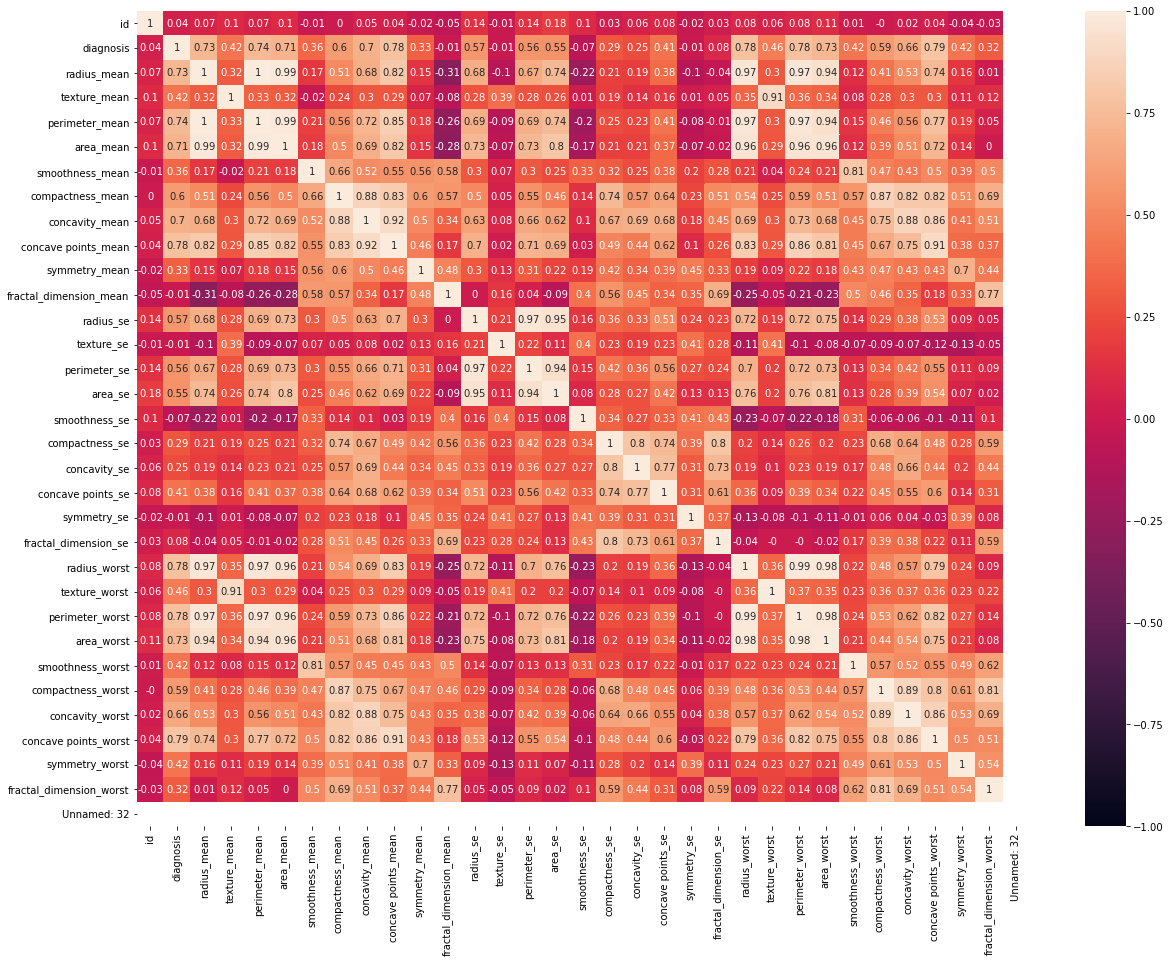

In [6]:
plt.figure(figsize=(20, 15))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### Reshape des données

In [7]:
X = data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
y = data['diagnosis']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Echantillonnage des données

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 113, random_state=5, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(456, 30)
(113, 30)
(456,)
(113,)


### Afficher sous forme d'histogrammes la distribution du jeu de données initial, du jeu de train et du jeu de test en fonction de chaque catégorie (bénigne et maline)

0    357
1    212
Name: diagnosis, dtype: int64


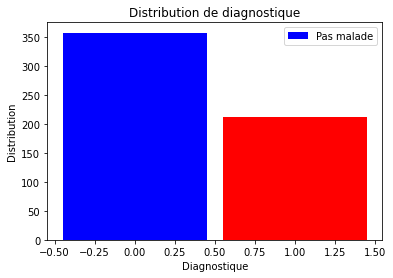

In [9]:
x=data["diagnosis"].value_counts().index
y=data["diagnosis"].value_counts()
plt.bar(x, y, color=["b","r"], width=0.9)
print(data["diagnosis"].value_counts())
plt.xlabel("Diagnostique",color="black",fontsize=10)
plt.ylabel("Distribution",color="black",fontsize=10)
plt.title("Distribution de diagnostique",color="black",fontsize=12)
plt.legend(["Pas malade","Malade"])
plt.show()

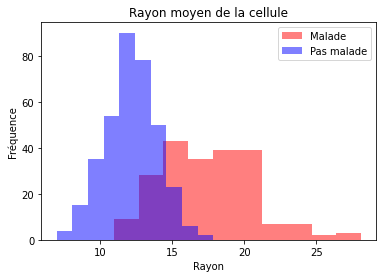

In [10]:
plt.hist(data["radius_mean"][data["diagnosis"]==1],color="r",alpha=0.5)
plt.hist(data["radius_mean"][data["diagnosis"]==0],color="b",alpha=0.5)
plt.title("Rayon moyen de la cellule",fontsize=12,color="black")
plt.xlabel('Rayon',fontsize=10,color="black")
plt.ylabel("Fréquence",fontsize=10,color="black")
plt.legend(["Malade","Pas malade"])
plt.show()

## Effectuer le Feature Scaling (standardisation)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

### Entrainer le modèle de régression logistique

In [12]:
model = LogisticRegression(C = 0.1, max_iter = 10000)
model.fit(scaled_X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

### Calculer et afficher les performances obtenues sur le jeu d'apprentissage (standardisation)
        . Matrice de confusion
        . Taux de classification, Rappel, Précision et F1-Score
        . Courbe ROC, AUC

#### Accuracy score (train / standardisation)

In [13]:
model.score(scaled_X_train, y_train)

0.9846491228070176

#### F1-score (train / standardisation)

In [14]:
from sklearn.metrics import classification_report

y_predict_train = model.predict(scaled_X_train)
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       286
           1       0.99      0.96      0.98       170

    accuracy                           0.98       456
   macro avg       0.99      0.98      0.98       456
weighted avg       0.98      0.98      0.98       456



In [15]:
# extraction du recall pour graph comparaison normal/standard
report = classification_report(y_train,y_predict_train,output_dict=True)
macro_recall_standard_train = report['macro avg']['recall']
macro_recall_standard_train

0.9806046894282188

#### Matrice de confusion (train / standardisation)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,y_predict_train)

array([[285,   1],
       [  6, 164]])

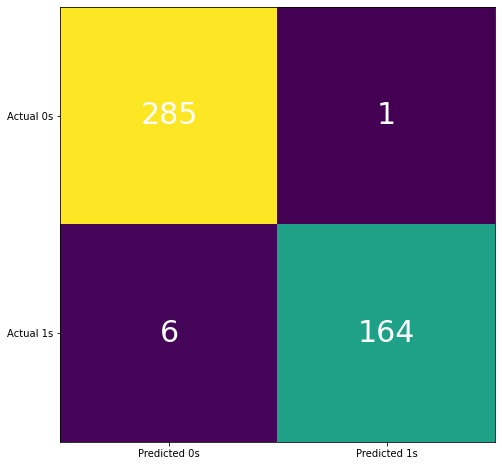

In [17]:
cm = confusion_matrix(y_train, y_predict_train)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w',fontsize=30)
plt.show()

#### Courbe ROC (train / standardisation)

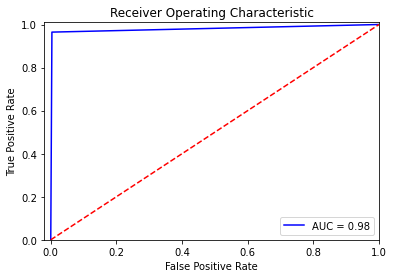

In [18]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc

probs = model.predict_proba(scaled_X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, y_predict_train)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Calculer et afficher les performances obtenues sur le jeu de test (standardisation)
        . Matrice de confusion
        . Taux de classification, Rappel, Précision et F1-Score
        . Courbe ROC, AUC

#### Accuracy score (test / standardisation)

In [19]:
from sklearn.metrics import accuracy_score

y_predict_test = model.predict(scaled_X_test)
accuracy_score(y_test,y_predict_test)

0.9646017699115044

#### F1-score (test / standardisation)

In [20]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.90      0.95        42

    accuracy                           0.96       113
   macro avg       0.97      0.95      0.96       113
weighted avg       0.97      0.96      0.96       113



In [21]:
# extraction du recall pour graph comparaison normal/standard
report = classification_report(y_train,y_predict_train,output_dict=True)
macro_recall_standard_test = report['macro avg']['recall']
macro_recall_standard_test

0.9806046894282188

#### Matrice de confusion (test / standardisation)

In [22]:
confusion_matrix(y_test,y_predict_test)

array([[71,  0],
       [ 4, 38]])

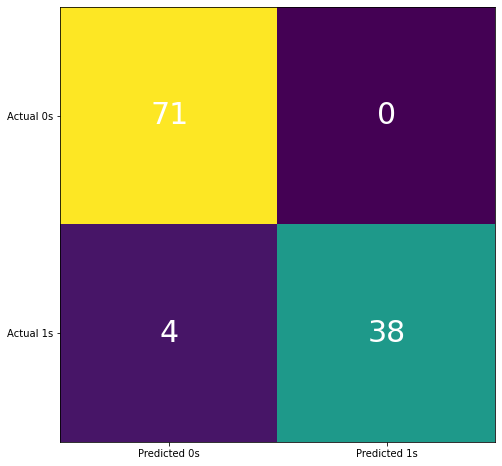

In [23]:
confusion_matrix(y_test,y_predict_test)
cm = confusion_matrix(y_test, y_predict_test)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w',fontsize=30)
plt.show()

#### Courbe ROC (test / standardisation)

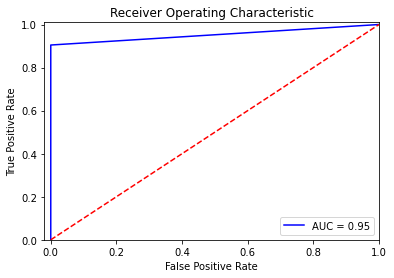

In [24]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fp, tp, threshold = metrics.roc_curve(y_test, y_predict_test)
roc_auc = metrics.auc(fp, tp)

plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Effectuer le Feature Scaling (normalisation)

In [25]:
from sklearn.preprocessing import MinMaxScaler

mix = MinMaxScaler()
scaled_X_train_n = mix.fit_transform(X_train)
scaled_X_test_n = mix.transform(X_test)

### Entrainer le model

In [26]:
model.fit(scaled_X_train_n, y_train)

LogisticRegression(C=0.1, max_iter=10000)

### Calculer et afficher les performances obtenues sur le jeu d'apprentissage (normalisation)
        . Matrice de confusion
        . Taux de classification, Rappel, Précision et F1-Score
        . Courbe ROC, AUC

#### Accuracy (train / normalisation)

In [27]:
model.score(scaled_X_train_n, y_train)

0.9517543859649122

#### F1-score (train / normalisation)

In [28]:
y_predict_train = model.predict(scaled_X_train_n)
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       286
           1       1.00      0.87      0.93       170

    accuracy                           0.95       456
   macro avg       0.96      0.94      0.95       456
weighted avg       0.96      0.95      0.95       456



In [29]:
# extraction du recall pour graph comparaison normal/standard
report = classification_report(y_train,y_predict_train,output_dict=True)
macro_recall_normal_train = report['macro avg']['recall']
macro_recall_normal_train

0.9352941176470588

#### Matrice de confusion (train / normalisation)

In [30]:
confusion_matrix(y_train,y_predict_train)

array([[286,   0],
       [ 22, 148]])

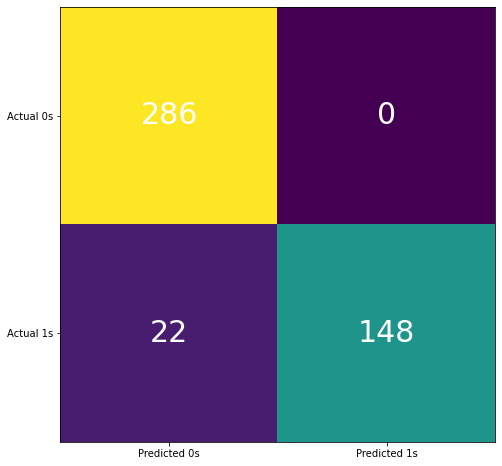

In [31]:
cm = confusion_matrix(y_train, y_predict_train)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w',fontsize=30)
plt.show()

#### Courbe ROC (train / normalisation)

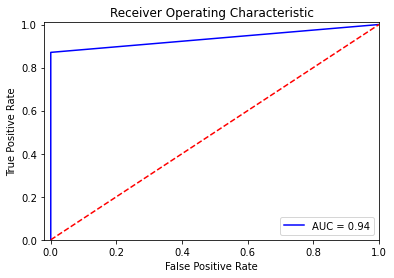

In [32]:
probs = model.predict_proba(scaled_X_train_n)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, y_predict_train)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Calculer et afficher les performances obtenues sur le jeu test (normalisation)
        . Matrice de confusion
        . Taux de classification, Rappel, Précision et F1-Score
        . Courbe ROC, AUC

#### Accuracy (test / normalisation)

In [46]:
y_predict_test_n = model.predict(scaled_X_test_n)
accuracy_score(y_test,y_predict_test)

0.8761061946902655

#### F1-score (test / normalisation)

In [34]:
print(classification_report(y_test,y_predict_test_n))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        71
           1       0.97      0.69      0.81        42

    accuracy                           0.88       113
   macro avg       0.91      0.84      0.86       113
weighted avg       0.89      0.88      0.87       113



In [35]:
# extraction du recall pour graph comparaison normal/standard
report = classification_report(y_train,y_predict_train,output_dict=True)
macro_recall_normal_test = report['macro avg']['recall']
macro_recall_normal_test

0.9352941176470588

#### Matrice de confusion (test / normalisation)

In [36]:
confusion_matrix(y_train,y_predict_train)

array([[286,   0],
       [ 22, 148]])

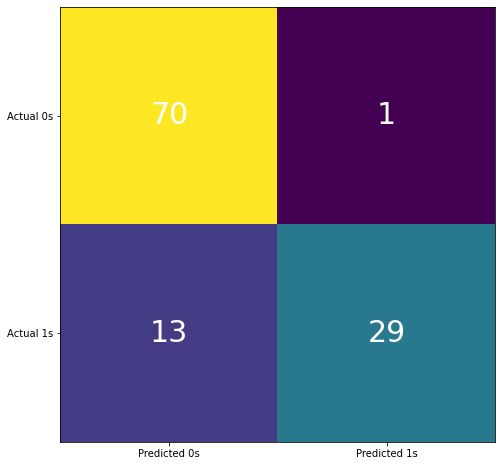

In [37]:
confusion_matrix(y_test,y_predict_test)
cm = confusion_matrix(y_test, y_predict_test)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w',fontsize=30)
plt.show()

#### Courbe ROC (test / normalisation)

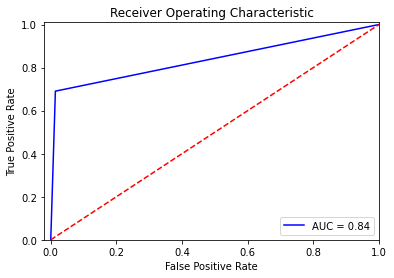

In [45]:
probs = model.predict_proba(scaled_X_test_n)
preds = probs[:,1]
fp, tp, threshold = metrics.roc_curve(y_test, y_predict_test)
roc_auc = metrics.auc(fp, tp)

plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Linear vs Logistic Regression

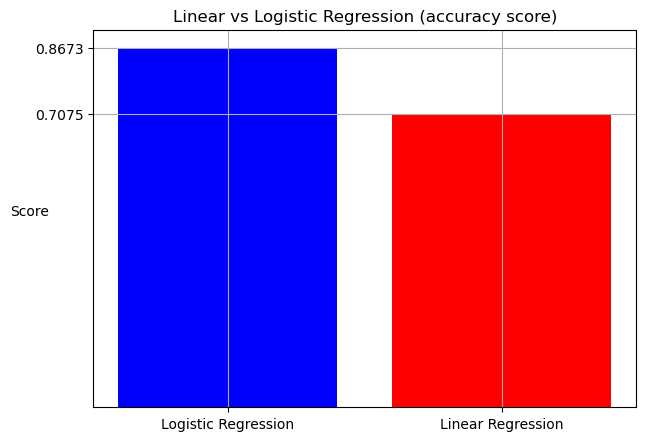

In [43]:
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(scaled_X_train, y_train)
linear = model_lin.score(scaled_X_test, y_test)
linear
logistic = model.score(scaled_X_test, y_test)
logistic
plt.figure(1,figsize=(7,5), dpi=100)
plt.title(f"")
plt.bar([0,1],[logistic, linear],color=["b","r"],
        label='',tick_label=['Logistic Regression','Linear Regression'])
plt.title('Linear vs Logistic Regression (accuracy score)')
plt.ylabel('Score',rotation=0)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(ticks=[logistic, linear])
plt.grid(True)
plt.show()

## Normalisation vs Standardisation (Recall score)

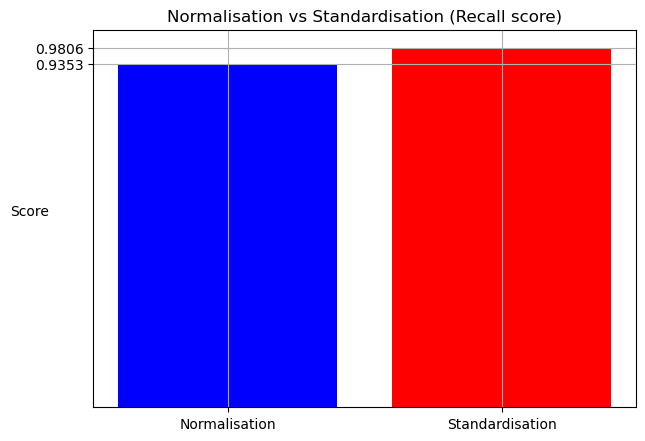

In [40]:
standard = (macro_recall_standard_train + macro_recall_standard_test)/2
normal = (macro_recall_normal_train + macro_recall_normal_test)/2

plt.figure(1,figsize=(7,5), dpi=100)
plt.title(f"")
plt.bar([0,1],[normal, standard],color=["Blue","red"],
        label='',tick_label=['Normalisation','Standardisation'])
plt.title('Normalisation vs Standardisation (Recall score)')
plt.ylabel('Score',rotation=0)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(ticks=[normal, standard])
plt.grid(True)
plt.show()

## Fonction sigmoïde

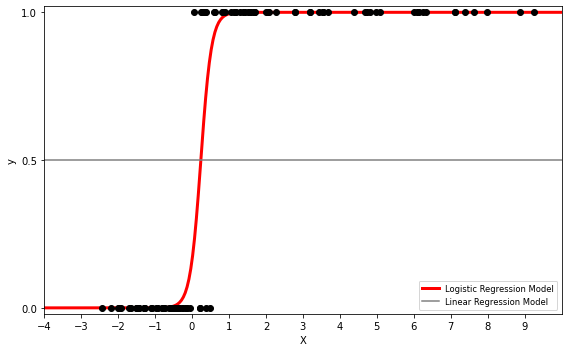

In [41]:
from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

#ols = linear_model.LinearRegression()
#ols.fit(X, y)
#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.02, 1.02)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()